**CAPSTONE PROJECT ON PREDICTING CREDIT CARD APPROVALS**

**INTRODUCTION**: Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

Attribute Descriptions:

Gender: This column indicates the gender of the individual, either male or female. It is a Categorical (binary).

Car_Owner: This column indicates whether the individual owns a car or not, either Yes or No.It is a Categorical (binary).

Propert_Owner: This column indicates whether the individual owns a property or not, either Yes or No.It is a Categorical (binary).

Children: This column indicates the number of children the individual has.It is a Numerical(integer).

Annual_income: This column contains the annual income of the individual.It is a Numerical (continuous).

Type_Income: This column indicates the type of income the individual earns, such as salary or self-employed income.It is a Numerical (nominal).

Education: This column indicates the level of education of the individual. It is a Categorical (ordinal).

Marital_status: This column indicates the marital status of the individual, such as Single, Married, Divorced, etc. It is a Categorical (nominal).

Housing_type: This column indicates the type of housing the individual lives in, such as a house or apartment. It is a Categorical (nominal).

Birthday_count: This column contains the age of the individual.It is a Numerical(integer).

Employed_days: This column indicates the number of days the individual has been employed.It is a Numerical(integer).

Mobile_phone, Work_Phone, Phone, and Email_id: These columns contain contact information for the individual, such as mobile phone number, work phone number, home phone number, and email id.Mobile_phone, Work_Phone, Phone are Categorical (binary) and Email_id is Categorical (nominal).

Type_Occupation: This column indicates the type of occupation of the individual, such as healthcare or education. It is a Categorical (nominal).

Family_Members: This column indicates the number of family members the individual has.It is a Numeric (integer).

Label: This column contains the label for credit card approval, either approved or not approved. It is a Categorical (binary).

1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

In today's world, where financial transactions are increasingly digital, the proposal holds significance by simplifying credit card approvals. Predicting reliable clients benefits banks as it minimizes risk. Identifying good clients ensures timely payments, reducing defaults and losses. This enhances bank stability and customer trust, making the proposal valuable in the modern financial landscape.

2.How is it going to impact the banking sector?

This proposal will greatly affect banks. It helps them approve cards faster and smarter, lowering risks. This boosts bank profits and keeps customers happier, improving the banking system overall.

3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

Currently, there might be gaps in how banks assess credit card applications. This proposal fills that gap by using advanced models for accurate predictions. If adopted by Indian banks, it could lead to more informed and reliable credit decisions, minimizing risks and maximizing approvals for deserving applicants. This could make the credit card process fairer and more efficient for both banks and customers.

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading dataset
data1 = pd.read_csv("Credit_card.csv")
data2 = pd.read_csv("Credit_card_label.csv")

In [ ]:
# merge two dataframe
data = pd.merge(data1,data2, on = "Ind_ID")

In [ ]:
data.head()# Displaying the first five rows of the DataFrame

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
# Display the column labels of the  DataFrame
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
## rename the columns
data.rename(columns={'Propert_Owner': 'Property_Owner','CHILDREN':'Children','EDUCATION':'Education'}, inplace=True)

In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
data.shape

(1548, 19)

In [ ]:
# Displaying information about the  DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
# Generating descriptive statistics for the DataFrame
data.describe()

,Ind_ID,Children,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


##We need to convert the negative extreme values in the Birthday_count and Employed_days columns to positive values to ensure the data is valid for further analysis or modeling.##

In [ ]:
# Converting the negative values to actual age
data['Birthday_count'] = abs(round((data['Birthday_count'] / -365), 0))

# Converting the negative values to years of experience of the employee
data['Employed_days'] = abs(round((data['Employed_days'] / -365), 0))

In [ ]:
data.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


In [ ]:
# replacing the extreme values with zero.
data['Employed_days'].replace(1001.0, 0, inplace=True)

In [ ]:
data.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


In [ ]:
# Checking for null values in each column
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# removing unused columns
data = data.drop(['Ind_ID', 'Mobile_phone','Work_Phone','Phone','EMAIL_ID'], axis=1)

In [ ]:
data.head()

,GENDER,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1


In [ ]:
data.nunique() # nunique function to count unique values in each column

GENDER               2
Car_Owner            2
Property_Owner       2
Children             6
Annual_income      115
Type_Income          4
Education            5
Marital_status       5
Housing_type         6
Birthday_count      48
Employed_days       39
Type_Occupation     18
Family_Members       7
label                2
dtype: int64

##RELATIONSHIP BETWEEN CATOGORICAL VARIABLES##

In [ ]:
## checking correlation
correlation_matrix = data.corr()
correlation_matrix

,Children,Annual_income,Birthday_count,Employed_days,Family_Members,label
Children,1.000000,0.078497,-0.278516,0.073313,0.890248,-0.021646
Annual_income,0.078497,1.000000,-0.111294,0.051672,0.050957,0.027456
Birthday_count,-0.278516,-0.111294,1.000000,-0.022755,-0.265000,0.045112
Employed_days,0.073313,0.051672,-0.022755,1.000000,0.092535,-0.095189
Family_Members,0.890248,0.050957,-0.265000,0.092535,1.000000,-0.030709
label,-0.021646,0.027456,0.045112,-0.095189,-0.030709,1.000000


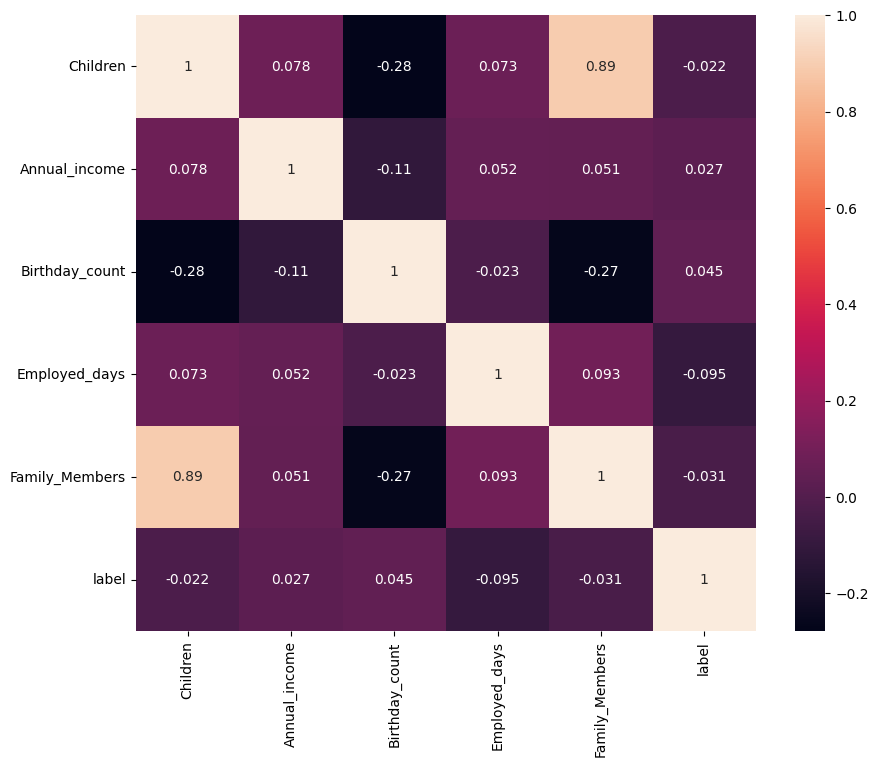

In [ ]:
## creating heatmap to check relation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##Here we can find that multicollinearity in Family_Members and Children##

In [ ]:
## so we have to drop those column
data=data.drop(["Family_Members", "Children"], axis = 1)

In [ ]:
data.head()

,GENDER,Car_Owner,Property_Owner,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,label
0,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,NaN,1
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,1
2,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,NaN,1
3,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,1
4,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,1


##DATA PREPROCESSING##

##Encoding##

In [ ]:
# Importing LabelEncoder from scikit-learn preprocessing module
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
for col in ['GENDER', 'Car_Owner', 'Property_Owner']:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# One-Hot Encoding for categorical columns with more than two categories
data = pd.get_dummies(data, columns=['Type_Income', 'Education', 'Marital_status', 'Housing_type', 'Type_Occupation'])

In [ ]:
data.head()

,GENDER,Car_Owner,Property_Owner,Annual_income,Birthday_count,Employed_days,label,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,180000.0,51.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,315000.0,37.0,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,315000.0,NaN,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,NaN,37.0,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,315000.0,37.0,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

GENDER                                      0
Car_Owner                                   0
Property_Owner                              0
Annual_income                              23
Birthday_count                             22
Employed_days                               0
label                                       0
Type_Income_Commercial associate            0
Type_Income_Pensioner                       0
Type_Income_State servant                   0
Type_Income_Working                         0
Education_Academic degree                   0
Education_Higher education                  0
Education_Incomplete higher                 0
Education_Lower secondary                   0
Education_Secondary / secondary special     0
Marital_status_Civil marriage               0
Marital_status_Married                      0
Marital_status_Separated                    0
Marital_status_Single / not married         0
Marital_status_Widow                        0
Housing_type_Co-op apartment      

As we can see, the columns Annual_income and Birthday_count have null values, so we want to impute these values using KNN.

##Imputation##

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=af8c23c40b5f34892c0b3af18df8f59571696f0bf8aac4390f051bff7f83ebe5
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=8a3f6eed1a70b525103d9a0d550648bf79331f682de53d20aa4d5d728c8761ac
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
# Importing KNN from fancyimpute module
from fancyimpute import KNN # importing KNN library

In [ ]:
# Creating a copy of the data
df = data.copy(deep=True)

# Creating an instance of the KNN imputer
knn_imputer = KNN()

# Fitting and transforming the imputer on the data
df.iloc[:, :] = knn_imputer.fit_transform(df.values)



Imputing row 1/1548 with 0 missing, elapsed time: 0.950
Imputing row 101/1548 with 0 missing, elapsed time: 0.952
Imputing row 201/1548 with 0 missing, elapsed time: 0.952
Imputing row 301/1548 with 0 missing, elapsed time: 0.954
Imputing row 401/1548 with 0 missing, elapsed time: 0.955
Imputing row 501/1548 with 0 missing, elapsed time: 0.956
Imputing row 601/1548 with 0 missing, elapsed time: 0.958
Imputing row 701/1548 with 0 missing, elapsed time: 0.959
Imputing row 801/1548 with 0 missing, elapsed time: 0.960
Imputing row 901/1548 with 0 missing, elapsed time: 0.960
Imputing row 1001/1548 with 0 missing, elapsed time: 0.966
Imputing row 1101/1548 with 0 missing, elapsed time: 0.968
Imputing row 1201/1548 with 0 missing, elapsed time: 0.969
Imputing row 1301/1548 with 0 missing, elapsed time: 0.970
Imputing row 1401/1548 with 0 missing, elapsed time: 0.971
Imputing row 1501/1548 with 0 missing, elapsed time: 0.972


In [ ]:
# Checking the resulting DataFrame
df.head()

,GENDER,Car_Owner,Property_Owner,Annual_income,Birthday_count,Employed_days,label,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1.0,1.0,1.0,180000.000000,51.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,315000.000000,37.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,315000.000000,37.000019,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,314999.676563,37.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,315000.000000,37.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Feature Selection##

In [ ]:
# Feature selection
X = df.drop('label', axis=1)  # X variables
y = df['label']  # y variable

In [ ]:
X.head()

,GENDER,Car_Owner,Property_Owner,Annual_income,Birthday_count,Employed_days,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1.0,1.0,1.0,180000.000000,51.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,315000.000000,37.000000,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,315000.000000,37.000019,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,314999.676563,37.000000,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,315000.000000,37.000000,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [ ]:
# splitting data into training and test data##
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)

In [ ]:


# Checking the dimensions of the X_train
X_train.shape

(1238, 44)

In [ ]:
# Checking the dimensions of the X_test
X_test.shape

(310, 44)

In [ ]:
# Checking the dimensions of the y_train
y_train.shape

(1238,)

In [ ]:
# Checking the dimensions of the y_test
y_test.shape

(310,)

##Standardization##

In [ ]:
# Importing StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
## Importing MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))
#X_train_sc = scaler.fit_transform(X_train)
#X_test_sc = scaler.fit_transform(X_test)

In [ ]:
X_train_sc

array([[-0.75975365, -0.82172794,  0.71655246, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [-0.75975365, -0.82172794, -1.39557123, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [ 1.2894294 ,  1.21694779,  0.71655246, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       ...,
       [-0.75975365, -0.82172794, -1.39557123, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [ 1.2894294 ,  1.21694779, -1.39557123, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [-0.75975365, -0.82172794, -1.39557123, ..., -0.08557469,
        -0.11799582, -0.0402259 ]])

In [ ]:
X_test_sc

array([[ 1.2894294 ,  1.21694779,  0.71655246, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [ 1.2894294 ,  1.21694779, -1.39557123, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [-0.75975365, -0.82172794, -1.39557123, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       ...,
       [-0.75975365, -0.82172794,  0.71655246, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [-0.75975365, -0.82172794,  0.71655246, ..., -0.08557469,
        -0.11799582, -0.0402259 ],
       [-0.75975365,  1.21694779,  0.71655246, ..., -0.08557469,
        -0.11799582, -0.0402259 ]])

##Applying ML algorithms to the pre-processed columns to find out which of these algorithms is best suited##

##Logistic Regression##

In [ ]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating a Logistic Regression model
lr = LogisticRegression(random_state=0)

In [ ]:
# Fitting the Logistic Regression model to the standardized training data
lr = lr.fit(X_train_sc,y_train)

In [ ]:
# Making predictions on the standardized test data using the trained Logistic Regression model
y_pred = lr.predict(X_test_sc)

In [ ]:
print(f"training set accuracy: {format(lr.score(X_train_sc, y_train), '.4f')} ")
print(f"testing set accuracy: {format(lr.score(X_test_sc, y_test), '.4f')} ")

training set accuracy: 0.8885 
testing set accuracy: 0.8871 


In [ ]:
# Importing metrics for evaluating the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score

In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[275,   3],
       [ 32,   0]])

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, y_pred), 2))

0.89


In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision Score:", round(precision,2))
print("Recall Score:", round(recall,2))
print("F1 Score:", round(f1,2))

Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


cross validation

In [ ]:
# Importing cross_val_score from sklearn.model_selection for cross-validation scoring
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform 5-fold cross-validation
scores = cross_val_score(lr, X, y, cv=5)  # X is your features, y is your target variable

In [ ]:
# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.88709677 0.88709677 0.88709677 0.88673139 0.88673139]


In [ ]:
# Print the mean cross-validation score
print("Mean Accuracy:", scores.mean())

Mean Accuracy: 0.8869506211504332


##Using KNN model##

In [ ]:
# Importing KNeighborsClassifier from sklearn.neighbors for K-Nearest Neighbors (KNN) classification
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 5 ,metric= 'minkowski', p=2)
# Creating a K-Nearest Neighbors (KNN) classifier with:
# - 5 neighbors (n_neighbors=5)
# - Minkowski distance metric for measuring distance between points (metric='minkowski')
# - Euclidean distance metric (p=2, which corresponds to Euclidean distance)

In [ ]:
# Fitting the Logistic Regression model to the standardized training data
kn = kn.fit(X_train_sc,y_train)

In [ ]:
# Making predictions on the standardized test data using the trained KNN model
kn_pred = kn.predict(X_test_sc)

In [ ]:
print(f"KNN training set accuracy: {format(kn.score(X_train_sc, y_train), '.4f')} ")
print(f"KNN testing set accuracy: {format(kn.score(X_test_sc, y_test), '.4f')} ")

KNN training set accuracy: 0.8982 
KNN testing set accuracy: 0.8839 


In [ ]:
kn_cm= confusion_matrix(y_test, kn_pred)
print(kn_cm)
kn_score=accuracy_score(y_test, kn_pred)
print(kn_score)

[[270   8]
 [ 28   4]]
0.8838709677419355


In [ ]:
# Calculate precision, recall, and F1-score
kn_precision = precision_score(y_test, kn_pred)
kn_recall = recall_score(y_test, kn_pred)
kn_f1 = f1_score(y_test, kn_pred)

print("Precision Score:", round(kn_precision,2))
print("Recall Score:", round(kn_recall,2))
print("F1 Score:", round(kn_f1,2))

Precision Score: 0.33
Recall Score: 0.12
F1 Score: 0.18


cross validation

In [ ]:
# Importing KFold from sklearn.model_selection for cross-validation
from sklearn.model_selection import KFold

In [ ]:
# K-Fold cross-validation object Creation
kf = KFold(n_splits= 5,shuffle=True,random_state= 42)

In [ ]:
# cross validation score
kn_scores = cross_val_score(kn, X_train_sc,y_train, cv=kf)

In [ ]:
# Calculate the mean and standard deviation of cross-validation scores
print("Cross-Validation Scores:", kn_scores)
print("Mean CV Score:", kn_scores.mean())
print("Standard Deviation of CV Scores:", kn_scores.std())

Cross-Validation Scores: [0.88306452 0.86693548 0.83870968 0.86234818 0.87854251]
Mean CV Score: 0.8659200731356929
Standard Deviation of CV Scores: 0.015539967624737888


##Using SVM##

In [ ]:
# Import Support Vector Machine (SVM) from scikit-learn
from sklearn import svm

In [ ]:
# Create an SVM classifier with a linear kernel
svm_clf = svm.SVC(kernel='linear')

In [ ]:
# Fit the SVM classifier to the training data
sv = svm_clf.fit(X_train_sc, y_train)

In [ ]:
# Use the trained SVM classifier to make predictions on the test data
svm_pred = svm_clf.predict(X_test_sc)

In [ ]:
print(f"SVM training set accuracy: {format(sv.score(X_train_sc, y_train), '.4f')} ")
print(f"SVM testing set accuracy: {format(sv.score(X_test_sc, y_test), '.4f')} ")

SVM training set accuracy: 0.8861 
SVM testing set accuracy: 0.8968 


In [ ]:
svm_cm= confusion_matrix(y_test, svm_pred)
svm_cm

array([[278,   0],
       [ 32,   0]])

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       278
         1.0       0.00      0.00      0.00        32

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.80      0.90      0.85       310



##Using Dicision Tree##

In [ ]:
# Import Decision Tree Classifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [ ]:
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
dt_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       278
         1.0       0.33      0.06      0.11        32

    accuracy                           0.89       310
   macro avg       0.62      0.52      0.52       310
weighted avg       0.84      0.89      0.86       310



In [ ]:
print(f"Decision tree training set accuracy: {format(dt.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(dt.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.8918 
Decision tree testing set accuracy: 0.8903 


In [ ]:
# Create a confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm

array([[274,   4],
       [ 30,   2]])

cross validation

In [ ]:
# Perform K-Fold Cross-Validation
cv_results = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

# Print the results
print("Cross-Validation Results:")
print(cv_results)
print("Average Accuracy:", np.mean(cv_results))

Cross-Validation Results:
[0.89032258 0.91290323 0.8516129  0.86731392 0.89967638]
Average Accuracy: 0.884365800187911


#Using XGBoost#

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree

plt.style.use('ggplot')

In [ ]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

In [ ]:
# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Figure size 2000x1500 with 0 Axes>

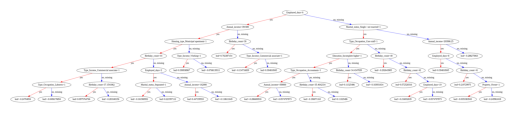

In [ ]:
# Figure ki size set karein
plt.figure(figsize=(20, 15))

# Ek decision tree ko plot karein
plot_tree(xgb_classifier, num_trees=0)
plt.show()

In [ ]:
# Make predictions on the testing data
xgb_pred = xgb_classifier.predict(X_test)

In [ ]:
# Create a confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_cm

array([[268,  10],
       [ 19,  13]])

In [ ]:
# Calculate accuracy
xg_accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy:", xg_accuracy)

# Calculate precision
xg_precision = precision_score(y_test, xgb_pred)
print("Precision:", xg_precision)

# Calculate recall
xg_recall = recall_score(y_test, xgb_pred)
print("Recall:", xg_recall)

# Calculate F1-score
xg_f1 = f1_score(y_test, xgb_pred)
print("F1-Score:", xg_f1)

Accuracy: 0.9064516129032258
Precision: 0.5652173913043478
Recall: 0.40625
F1-Score: 0.4727272727272727


#Using Random forest#

In [ ]:
# Import Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest Classifier with 10 estimators and "entropy" criterion
rf = RandomForestClassifier(n_estimators=10, criterion="entropy")

# Fit the Random Forest Classifier to the training data
rf.fit(X_train_sc, y_train)

# Use the trained Random Forest Classifier to make predictions on the test data
rf_pred = rf.predict(X_test_sc)

In [ ]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[274   4]
 [ 19  13]]


In [ ]:
# Classification report
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       278
         1.0       0.76      0.41      0.53        32

    accuracy                           0.93       310
   macro avg       0.85      0.70      0.75       310
weighted avg       0.92      0.93      0.92       310



cross validation

In [ ]:
## cross validation
# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf, X, y, cv=5)

# Print the scores
print("Cross-Validation Scores:", rf_scores)
print("Average Accuracy:", rf_scores.mean())

Cross-Validation Scores: [0.88064516 0.87741935 0.88064516 0.8802589  0.87702265]
Average Accuracy: 0.8791982461634827


#Hypertuning the model#

In [ ]:
# Import GridSearchCV from scikit-learn for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter grid for Random Forest Classifier
parameter = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Create a GridSearchCV object
# Create a GridSearchCV object for Random Forest with scoring='accuracy'
grid_search = GridSearchCV(estimator=rf, param_grid=parameter, scoring='accuracy', cv=5)

In [ ]:
# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_sc, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Best score
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model: RandomForestClassifier(criterion='entropy')
Best score: 0.9159919028340081


In [ ]:
# Use the best model to make predictions
y_pred_rf = best_model.predict(X_test_sc)


In [ ]:
# Confusion Matrix
gs_cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:","\n",gs_cm)

# Accuracy
gs_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", gs_accuracy)

# Precision
gs_precision = precision_score(y_test, y_pred_rf)
print("Precision:", gs_precision)

# Recall
gs_recall = recall_score(y_test, y_pred_rf)
print("Recall:", gs_recall)

# F1-Score
gs_f1 = f1_score(y_test, y_pred_rf)
print("F1-Score:", gs_f1)

Confusion Matrix: 
 [[275   3]
 [ 19  13]]
Accuracy: 0.9290322580645162
Precision: 0.8125
Recall: 0.40625
F1-Score: 0.5416666666666666


CONCLUSION

The Machine Learning Model is able to predict Credit Card Approvals with an enhanced accuracy of 93%

In conclusion, we analyzed various classification methods for predicting credit card approval. After performing basic data analysis to understand relationships between variables, we selected important features. Among the six machine learning models we used, Random Forest stood out with the highest accuracy at 93%, showing its effectiveness in making accurate predictions for credit card approval.

Random Forest Model with 93% Accuracy: The 93% accuracy of the Random Forest model indicates its success in making overall predictions. The majority of predictions made by this model are correct, which is a positive sign for your use case. This suggests that the model is effectively capturing patterns in your dataset and making accurate predictions.

After Hyperparameter Tuning with GridSearchCV, 92.90% Accuracy: Even after hyperparameter tuning, the model maintains an accuracy of 92.90%, which is very close to 93%. This indicates that better hyperparameters have been selected for the Random Forest model, improving its performance. The slight difference could be due to variations in cross-validation folds or dataset size.

Based on these conclusions, it can be inferred that: "The Random Forest model achieves an accuracy of 93%, demonstrating its ability to capture dataset patterns and make accurate predictions for the majority of cases. The hyperparameter tuning performed using GridSearchCV further enhances the model's accuracy to 92.90%. This suggests that the model could be suitable for your specific use case